In [1]:
# RNN implement with numpy
import numpy as np
# timesteps: the amount of time step you run the RNN
timesteps = 100 
# dimensionality of the input feature space
input_features = 32
# dimensionality of the output feature space
output_features = 64

# input data takes batch of 100 sequences of length 32
inputs = np.random.random((timesteps, input_features))
# states output and put into next layer
state_t = np.zeros((output_features,))

# weights (for step function)
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sentence = np.concatenate(successive_outputs, axis=0)
final_output_sentence

array([0.99999942, 0.99999799, 0.99999702, ..., 1.        , 1.        ,
       1.        ])

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
# input dimensionality = 10000, output dimensionality = 32
model.add(Embedding(10000, 32))
# dimensionality of output = 32
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
# return 3D tensor with shape
# return_sequences: whether to return the last output in the output sequence
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# stack several Recurrent layers one after the other in order to increase the representational power of a network
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
# model on the IMDB movie-review classification problem
# 1. Preprocess the data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500 # cut off 500 words after 10000 words
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('Train sequences', len(input_train))
print('Test sequences', len(input_test))

# pad_sequences(): pad sequences to the same length
# sequence: list of lists, where each element is a sequence
# maxlen: int, max length of all sequences
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input train shape:', input_train.shape)
print('input test shape:', input_test.shape)

Loading data...
Train sequences 25000
Test sequences 25000
input train shape: (25000, 500)
input test shape: (25000, 500)


In [6]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split=0.2)
# 20% of training data --> validation data

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


/home/cindy/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.5702 - acc: 0.7054 - val_loss: 0.4108 - val_acc: 0.8316
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3612 - acc: 0.8532 - val_loss: 0.3565 - val_acc: 0.8516
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2701 - acc: 0.8961 - val_loss: 0.3479 - val_acc: 0.8660
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2209 - acc: 0.9158 - val_loss: 0.3448 - val_acc: 0.8626
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1734 - acc: 0.9360 - val_loss: 0.4297 - val_acc: 0.8074
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1395 - acc: 0.9481 - val_loss: 0.4577 - val_acc: 0.8572
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1003 - acc: 0.9640 - val_loss: 0.4527 - val_acc:

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

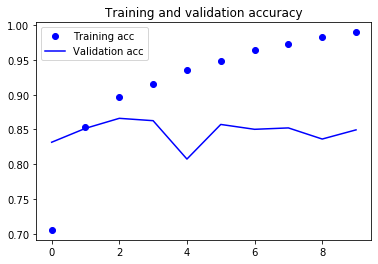

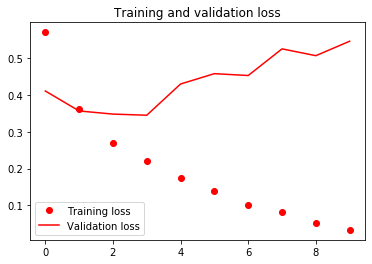

In [8]:
# Plot the training and validation loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot the training and validation accuracy graph
# x-axis is epochs, y-axis is acc / val_acc
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot the training and validation loss graph
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# The recurrent network does not perform very well

In [9]:
# LSTM implement
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

/home/cindy/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.4952 - acc: 0.7692 - val_loss: 0.3798 - val_acc: 0.8398
Epoch 2/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2946 - acc: 0.8823 - val_loss: 0.4417 - val_acc: 0.8150
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2343 - acc: 0.9119 - val_loss: 0.2970 - val_acc: 0.8748
Epoch 4/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1939 - acc: 0.9295 - val_loss: 0.3024 - val_acc: 0.8852
Epoch 5/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1716 - acc: 0.9383 - val_loss: 0.3020 - val_acc: 0.8784
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1521 - acc: 0.9456 - val_loss: 0.3502 - val_acc: 0.8502
Epoch 7/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1353 - acc: 0.9519 - val_loss: 0.3490 - val_acc:

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

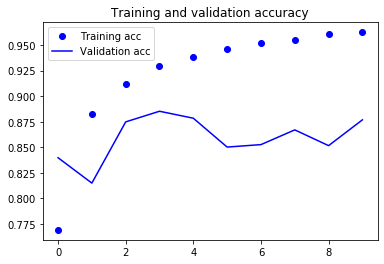

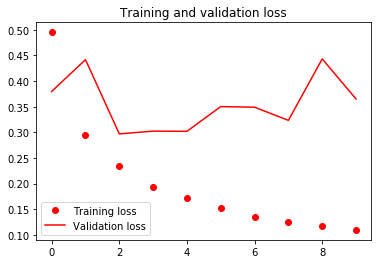

In [12]:
# Plot the training and validation loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot the training and validation accuracy graph
# x-axis is epochs, y-axis is acc / val_acc
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot the training and validation loss graph
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# much better than SimpleRNN